# Spotlight Posts: Performance Forecast
Using Facebook Prophet, we will predict the performance of Spotlight Posts based on 5 criteria: Impressions, URL Clicks, Likes, Retweets, Replies.

## Method
Facebook Prophet provides a model that can be trained on time series data in order to predict future outcomes. The Prophet object, requires a dataframe with a date column and a y (output) column. After plotting a forecast, it will detect and mark points of change in the plot.

## Steps
1. Clean/Re-label DataFrame and Isolate one criterion for the outcome column (i.e. "Impressions").
1. Instantiate Prophet Object (Model) with paramaters.
1. Train Model on historical DataFrame.
1. Produce Future DataFrame (future date inputs from which the Model will generate predictions).
1. Use Model to generate and plot predictions.
1. Show Changepoints (dashed lines indicate turning points in the time series).
1. Show components of forecast to better visualize the trend

### Import Dependencies

In [1]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#Read Master CSV
goldie_df = pd.read_csv("goldie_master_cleaned_0314.csv")
goldie_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,time,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements
0,0,https://twitter.com/GoldieChan/status/94776617...,HAPPY NEW YEAR 🎉\nMay all your dreams come tru...,2.0,2018-01-01 09:47:00+00:00,532.0,11.0,0.020677,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0,45,6
1,1,https://twitter.com/GoldieChan/status/94825542...,“I've learned that you shouldn't go through li...,3.0,2018-01-02 18:11:00+00:00,409.0,6.0,0.014670,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0,0,0
2,2,https://twitter.com/GoldieChan/status/94829378...,This 👇 https://t.co/4niBsvseUQ,1.0,2018-01-02 20:43:00+00:00,366.0,1.0,0.002732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,3,https://twitter.com/GoldieChan/status/94835616...,Where should I go next? #travel https://t.co/D...,3.0,2018-01-03 00:51:00+00:00,465.0,7.0,0.015054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,7
4,4,https://twitter.com/GoldieChan/status/94840888...,DONE with first day of #work back. Current fee...,2.0,2018-01-03 04:21:00+00:00,528.0,12.0,0.022727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,11,11


In [3]:
#Changing Date/Time to "YYYY-MM-DD" format
goldie_df['year'] = pd.to_datetime(goldie_df['time']).dt.year.astype(str)
goldie_df['month'] = pd.to_datetime(goldie_df['time']).dt.month.astype(str)
goldie_df['day'] = pd.to_datetime(goldie_df['time']).dt.day.astype(str)

goldie_df['date'] = goldie_df[['year', 'month', 'day']].agg('-'.join, axis=1)
goldie_df = goldie_df.drop(columns = ["year", "month", "day"])
goldie_df = goldie_df.drop(columns = "time")

In [4]:
goldie_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
0,0,https://twitter.com/GoldieChan/status/94776617...,HAPPY NEW YEAR 🎉\nMay all your dreams come tru...,2.0,532.0,11.0,0.020677,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0,45,6,2018-1-1
1,1,https://twitter.com/GoldieChan/status/94825542...,“I've learned that you shouldn't go through li...,3.0,409.0,6.0,0.014670,2.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,0,0,0,2018-1-2
2,2,https://twitter.com/GoldieChan/status/94829378...,This 👇 https://t.co/4niBsvseUQ,1.0,366.0,1.0,0.002732,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,2018-1-2
3,3,https://twitter.com/GoldieChan/status/94835616...,Where should I go next? #travel https://t.co/D...,3.0,465.0,7.0,0.015054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,7,7,2018-1-3
4,4,https://twitter.com/GoldieChan/status/94840888...,DONE with first day of #work back. Current fee...,2.0,528.0,12.0,0.022727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,11,11,2018-1-3


In [5]:
#Identify and Drop the Biggest Outlier
sample = goldie_df.sort_values(by=["impressions"], ascending=False)
sample.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
6258,6258,https://twitter.com/GoldieChan/status/11768922...,So excited that @Forbes shared my article on @...,1.0,608789.0,38345.0,0.062986,71.0,13.0,907.0,2077.0,753.0,0.0,459.0,0.0,1,34064,34064,2019-9-25
6779,6779,https://twitter.com/GoldieChan/status/11839781...,My next few 💚 talks &amp; livestreams:\n✨ #Vid...,2.0,283615.0,85.0,0.000300,11.0,1.0,22.0,10.0,0.0,1.0,11.0,0.0,0,491,29,2019-10-15
4798,4798,https://twitter.com/GoldieChan/status/11527092...,On a magical journey with #Funko Mira of @dark...,2.0,221055.0,6372.0,0.028825,42.0,3.0,339.0,172.0,80.0,18.0,230.0,0.0,0,5488,5488,2019-7-20
7426,7426,https://twitter.com/GoldieChan/status/11926178...,We’re on the red carpet for @OriginalFunko #Ho...,2.0,218574.0,3854.0,0.017632,16.0,11.0,216.0,387.0,17.0,55.0,268.0,0.0,0,2884,2884,2019-11-8
4797,4797,https://twitter.com/GoldieChan/status/11526773...,Always an absolute joy to collaborate with one...,2.0,209145.0,5912.0,0.028267,13.0,3.0,205.0,276.0,67.0,25.0,213.0,0.0,0,5110,5110,2019-7-20


In [6]:
goldie_df = goldie_df.drop([6258])

In [7]:
#Spotlight DataFrame
spot = goldie_df.copy()
spot_df = spot[spot["Type"] == 2]
spot_df.head()

,Unnamed: 0,Tweet permalink,Tweet text,Type,impressions,engagements,engagement rate,retweets,replies,likes,user profile clicks,url clicks,hashtag clicks,detail expands,permalink clicks,follows,media views,media engagements,date
0,0,https://twitter.com/GoldieChan/status/94776617...,HAPPY NEW YEAR 🎉\nMay all your dreams come tru...,2.0,532.0,11.0,0.020677,0.0,0.0,3.0,1.0,0.0,0.0,1.0,0.0,0,45,6,2018-1-1
4,4,https://twitter.com/GoldieChan/status/94840888...,DONE with first day of #work back. Current fee...,2.0,528.0,12.0,0.022727,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,11,11,2018-1-3
26,26,https://twitter.com/GoldieChan/status/95274055...,On holding space ✨\n\nHolding space is creatin...,2.0,684.0,15.0,0.021930,0.0,1.0,8.0,3.0,0.0,0.0,3.0,0.0,0,0,0,2018-1-15
31,31,https://twitter.com/GoldieChan/status/95372459...,Keep your goals away from the trolls.,2.0,865.0,17.0,0.019653,3.0,0.0,8.0,3.0,0.0,0.0,3.0,0.0,0,0,0,2018-1-17
32,32,https://twitter.com/GoldieChan/status/95373442...,Come listen to me speak on leading with #LOVE ...,2.0,496.0,11.0,0.022177,0.0,0.0,7.0,0.0,1.0,0.0,0.0,0.0,0,3,3,2018-1-17


## Forecast Impression Data for Spotlight Posts

In [8]:
#Spotlight Impressions cleaned
spot_impr_df = spot_df[["date", "impressions"]]
spot_impr_df = spot_impr_df.rename(columns = {"date": "ds", "impressions": "y"})
spot_impr_df.head()

,ds,y
0,2018-1-1,532.0
4,2018-1-3,528.0
26,2018-1-15,684.0
31,2018-1-17,865.0
32,2018-1-17,496.0


In [9]:
#Check for Outstanding Outliers
spot_impr_df.sort_values(by=['y'], ascending=False).head()

,ds,y
6779,2019-10-15,283615.0
4798,2019-7-20,221055.0
7426,2019-11-8,218574.0
4797,2019-7-20,209145.0
7453,2019-11-8,196800.0


In [10]:
#Drop Outstanding Outliers to fix skew
spot_impr_df = spot_impr_df.drop([4797, 6779])

In [11]:
#Check new df
spot_impr_df.sort_values(by=['y'], ascending=False).head()

,ds,y
4798,2019-7-20,221055.0
7426,2019-11-8,218574.0
7453,2019-11-8,196800.0
4814,2019-7-21,174886.0
5457,2019-8-22,121752.0


#### Note on "changepoint_prior_scale" value when instantiating a Prophet model

``` 
m = Prophet(changepoint_prior_scale=0.05)
```

Default value is 0.05. The higher the value, the more flexible the model is which fits it closer to the historical data. As a result, the trend plot more closely resembles the prediction of the forecast plot, but the margin of error for prediction is wider. 

The lower the value, the less flexible the model is. This means the trend line is less fitted to the historical data. If the historical data has a net positive slope, the trend line produced will resemble a straight line with a positive slope without a margin of error.

Determining the value of "changepoint_prior_scale" has some arbitrary dimension based on client need.

Calibrate the value and check the trend line in the Forecast Components section below the prediction plot.

In [12]:
#Instantiate Prophet Class for Spotlight-Impressions
m_spot_impr = Prophet(yearly_seasonality=True, changepoint_prior_scale=3)

In [13]:
#Train model on Impression Data for Spotlight Posts
m_spot_impr.fit(spot_impr_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [14]:
#Generate 365 days into future for x-axis
future_spot_impr = m_spot_impr.make_future_dataframe(periods=365)
future_spot_impr.tail()

,ds
2605,2021-02-24
2606,2021-02-25
2607,2021-02-26
2608,2021-02-27
2609,2021-02-28


In [15]:
#Predict Impressions of Spotlight Posts for 1 Year
forecast_spot_impr = m_spot_impr.predict(future_spot_impr)
forecast_spot_impr[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2605,2021-02-24,-2239.525239,-75340.941696,72256.350981
2606,2021-02-25,-1571.856512,-75146.167764,71832.130913
2607,2021-02-26,-106.099513,-76099.447953,75898.496536
2608,2021-02-27,-1220.462211,-77026.558059,72595.932308
2609,2021-02-28,-1497.808234,-73732.221801,69682.117969


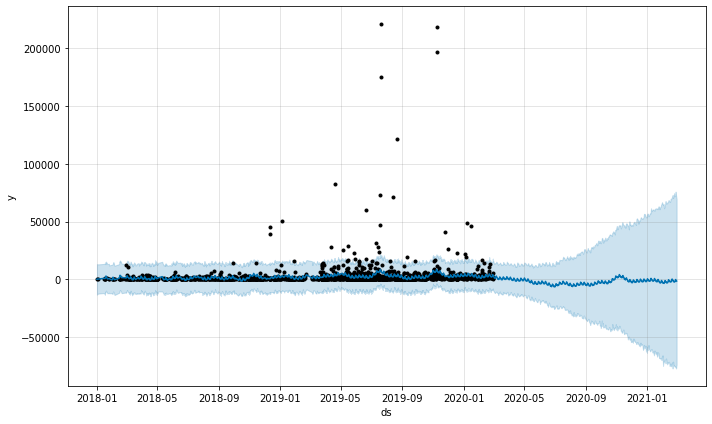

In [16]:
#Plot Forecast of Impressions for Spotlight Posts
forecast_spot_impr_plot = m_spot_impr.plot(forecast_spot_impr)

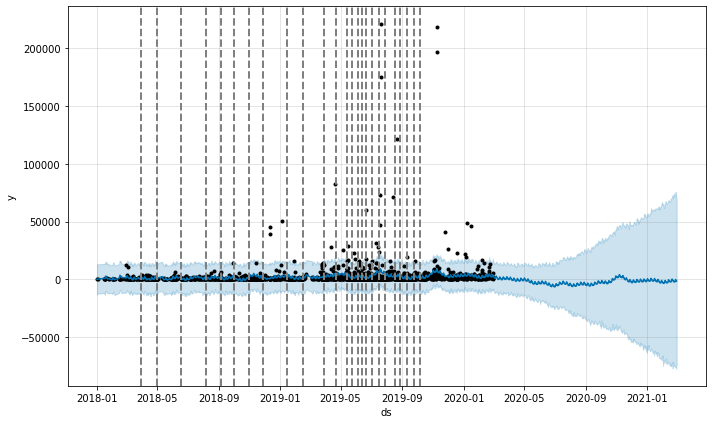

In [17]:
#Plot Changepoints
m_spot_impr.plot(forecast_spot_impr)
a = add_changepoints_to_plot(forecast_spot_impr_plot.gca(), m_spot_impr, forecast_spot_impr)

for cp in m_spot_impr.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

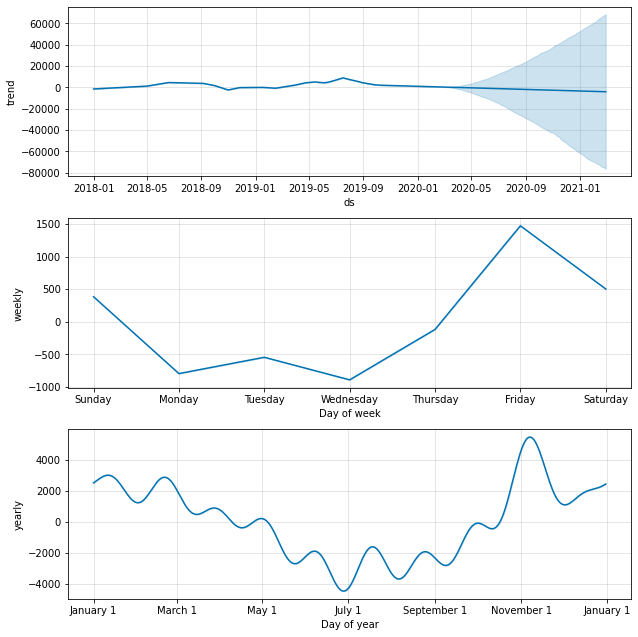

In [18]:
#Components of Forecast
forecast_spot_impr_plot_2 = m_spot_impr.plot_components(forecast_spot_impr)

## Forecast Click Data for Spotlight Posts

In [19]:
#Spotlight Clicks DF
spot_click_df = spot_df[["date", "url clicks"]]
spot_click_df.sort_values(by=["url clicks"], ascending=False)

,date,url clicks
3119,2019-4-19,1522.0
4814,2019-7-21,773.0
4774,2019-7-19,654.0
2070,2018-12-11,507.0
2087,2018-12-11,438.0
...,...,...
3023,2019-4-11,0.0
3003,2019-4-9,0.0
2992,2019-4-8,0.0
2988,2019-4-8,0.0


In [20]:
#Spotlight Clicks Cleaned
spot_click_df = spot_click_df.rename(columns = {"date": "ds", "url clicks": "y"})
spot_click_df.head()

,ds,y
0,2018-1-1,0.0
4,2018-1-3,0.0
26,2018-1-15,0.0
31,2018-1-17,0.0
32,2018-1-17,1.0


In [21]:
#Instantiate Prophet Class for Promotions-Clicks
m_spot_clicks = Prophet(yearly_seasonality=True, changepoint_prior_scale=2)

In [22]:
#Train model on Click Data for Promotions
m_spot_clicks.fit(spot_click_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [23]:
#Generate 365 days into future for x-axis
future_spot_clicks = m_spot_clicks.make_future_dataframe(periods=365)
future_spot_clicks.tail()

,ds
2607,2021-02-24
2608,2021-02-25
2609,2021-02-26
2610,2021-02-27
2611,2021-02-28


In [24]:
#Predict Clicks of Promotional Posts for 1 Year
forecast_spot_clicks = m_spot_clicks.predict(future_spot_clicks)
forecast_spot_clicks[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2607,2021-02-24,21.007621,-407.240583,470.192949
2608,2021-02-25,23.332809,-395.376088,474.896599
2609,2021-02-26,30.339734,-396.349880,491.529297
2610,2021-02-27,22.598756,-396.892620,481.975599
2611,2021-02-28,26.237918,-382.356902,488.854119


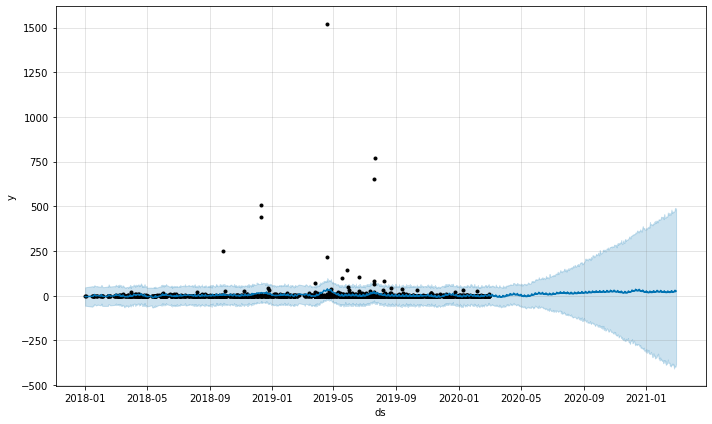

In [25]:
#Plot Forecast of Clicks for Promotional Posts
forecast_spot_clicks_plot = m_spot_clicks.plot(forecast_spot_clicks)

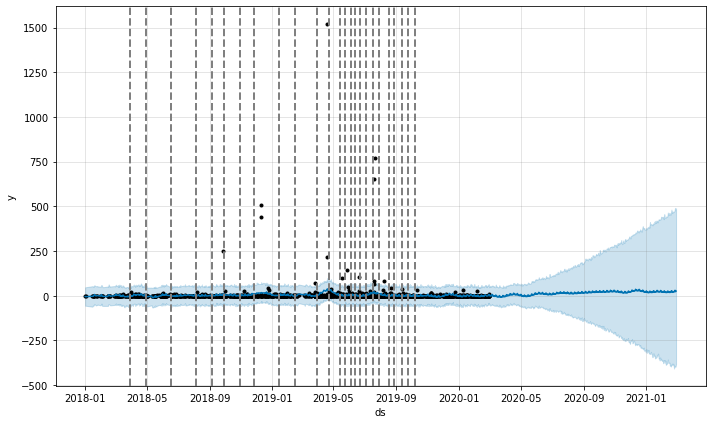

In [26]:
#Plot Changepoints
m_spot_clicks.plot(forecast_spot_clicks)
a = add_changepoints_to_plot(forecast_spot_clicks_plot.gca(), m_spot_clicks, forecast_spot_clicks)

for cp in m_spot_clicks.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

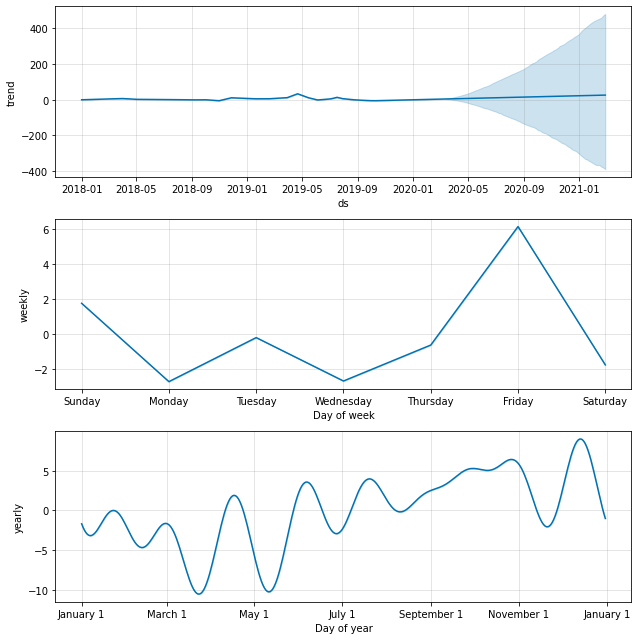

In [27]:
#Components of Forecast
forecast_spot_clicks_plot_2 = m_spot_clicks.plot_components(forecast_spot_clicks)

## Forecast Retweet Data for Spotlight Posts

In [28]:
#Create Data Frame for Retweet Data on Spotlight Posts
spot_retweet_df = spot_df[["date", "retweets"]]
spot_retweet_df.sort_values(by=["retweets"], ascending=False)

,date,retweets
7453,2019-11-8,223.0
3119,2019-4-19,221.0
9207,2020-1-15,93.0
2070,2018-12-11,80.0
8086,2019-11-30,80.0
...,...,...
3978,2019-6-12,0.0
3976,2019-6-12,0.0
3971,2019-6-12,0.0
1180,2018-8-13,0.0


In [29]:
#Spotlight Retweets DF Cleaned
spot_retweet_df = spot_retweet_df.rename(columns = {"date": "ds", "retweets": "y"})
spot_retweet_df.head()

,ds,y
0,2018-1-1,0.0
4,2018-1-3,0.0
26,2018-1-15,0.0
31,2018-1-17,3.0
32,2018-1-17,0.0


In [30]:
#Instantiate Prophet Class for Spotlight-Retweets 
m_spot_retweets = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.8)

In [31]:
#Train model on Retweet Data for Promotions
m_spot_retweets.fit(spot_retweet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
#Generate 365 days into future for x-axis
future_spot_retweets = m_spot_retweets.make_future_dataframe(periods=365)
future_spot_retweets.tail()

,ds
2607,2021-02-24
2608,2021-02-25
2609,2021-02-26
2610,2021-02-27
2611,2021-02-28


In [33]:
#Predict Retweets of Promotional Posts for 1 Year
forecast_spot_retweets = m_spot_retweets.predict(future_spot_retweets)
forecast_spot_retweets[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2607,2021-02-24,1.505570,-18.637635,19.358414
2608,2021-02-25,1.466434,-16.987540,20.594332
2609,2021-02-26,3.494101,-15.994338,21.577523
2610,2021-02-27,1.829860,-17.396343,20.977606
2611,2021-02-28,1.414032,-18.714118,19.967763


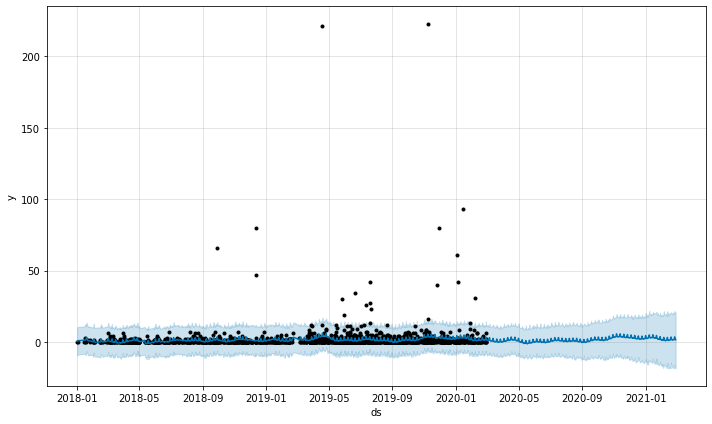

In [34]:
#Plot Forecast of Retweets for Promotional Posts
forecast_spot_retweets_plot = m_spot_retweets.plot(forecast_spot_retweets)

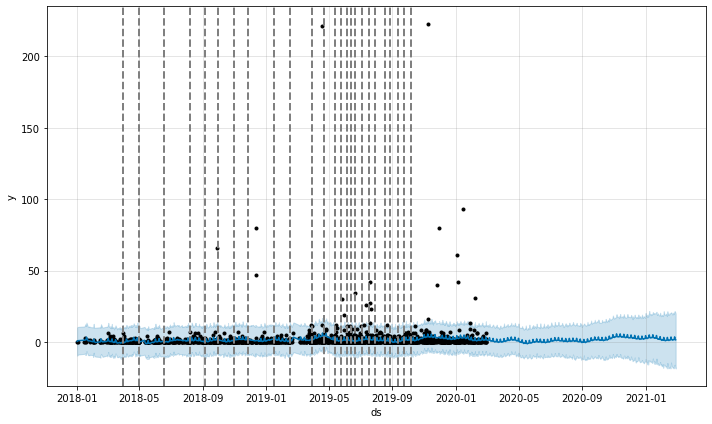

In [35]:
#Plot Changepoints
m_spot_retweets.plot(forecast_spot_retweets)
a = add_changepoints_to_plot(forecast_spot_retweets_plot.gca(), m_spot_retweets, forecast_spot_retweets)

for cp in m_spot_retweets.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

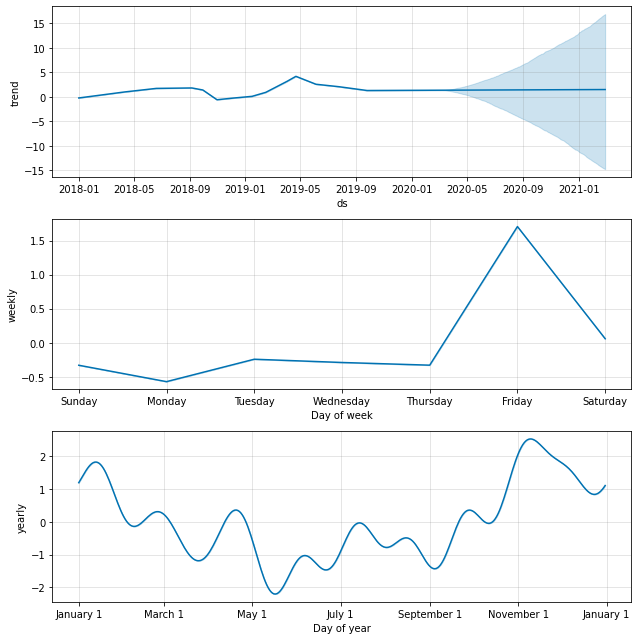

In [36]:
#Components of Forecast
forecast_spot_retweets_plot_2 = m_spot_retweets.plot_components(forecast_spot_retweets)

## Forecast Like Data for Spotlight Posts

In [37]:
#Create Data Frame for Like Data on Promotional Posts
spot_like_df = spot_df[["date", "likes"]]
spot_like_df.sort_values(by=["likes"], ascending=False)

,date,likes
3119,2019-4-19,1332.0
7453,2019-11-8,1120.0
4216,2019-6-21,403.0
7980,2019-11-25,374.0
4798,2019-7-20,339.0
...,...,...
3146,2019-4-22,0.0
3142,2019-4-22,0.0
332,2018-4-9,0.0
1951,2018-11-20,0.0


In [38]:
#Spotlight Likes DF Cleaned
spot_like_df = spot_like_df.rename(columns = {"date": "ds", "likes": "y"})
spot_like_df.head()

,ds,y
0,2018-1-1,3.0
4,2018-1-3,1.0
26,2018-1-15,8.0
31,2018-1-17,8.0
32,2018-1-17,7.0


In [39]:
#Instantiate Prophet Class for Promotions-Likes
m_spot_likes = Prophet(yearly_seasonality=True, changepoint_prior_scale=3)

In [40]:
#Train model on Like Data for Promotions
m_spot_likes.fit(spot_like_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [41]:
#Generate 365 days into future for x-axis
future_spot_likes = m_spot_likes.make_future_dataframe(periods=365)
future_spot_likes.tail()

,ds
2607,2021-02-24
2608,2021-02-25
2609,2021-02-26
2610,2021-02-27
2611,2021-02-28


In [42]:
#Predict Likes of Promotional Posts for 1 Year
forecast_spot_likes = m_spot_likes.predict(future_spot_likes)
forecast_spot_likes[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2607,2021-02-24,1.779192,-272.250307,291.907672
2608,2021-02-25,3.631598,-274.461753,287.323887
2609,2021-02-26,15.448904,-259.135332,304.442514
2610,2021-02-27,6.005561,-272.402917,294.404186
2611,2021-02-28,3.540506,-275.147094,283.627320


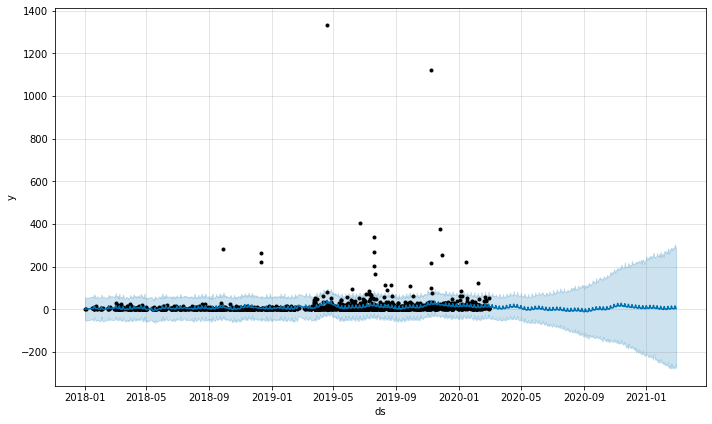

In [43]:
#Plot Forecast of Likes for Promotional Posts
forecast_spot_likes_plot = m_spot_likes.plot(forecast_spot_likes)

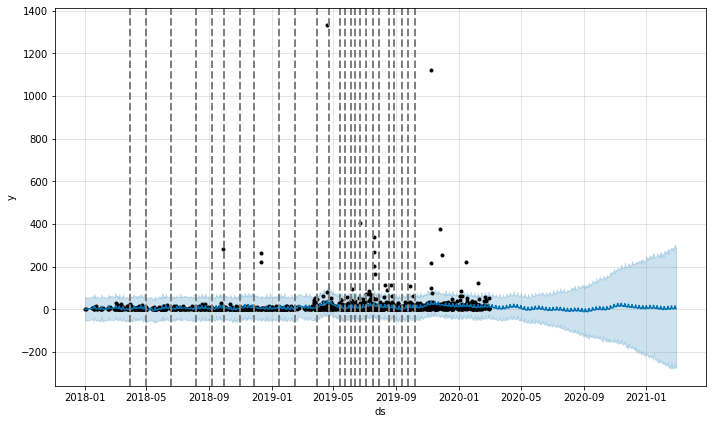

In [44]:
#Plot Changepoints
m_spot_likes.plot(forecast_spot_likes)
a = add_changepoints_to_plot(forecast_spot_likes_plot.gca(), m_spot_likes, forecast_spot_likes)

for cp in m_spot_likes.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

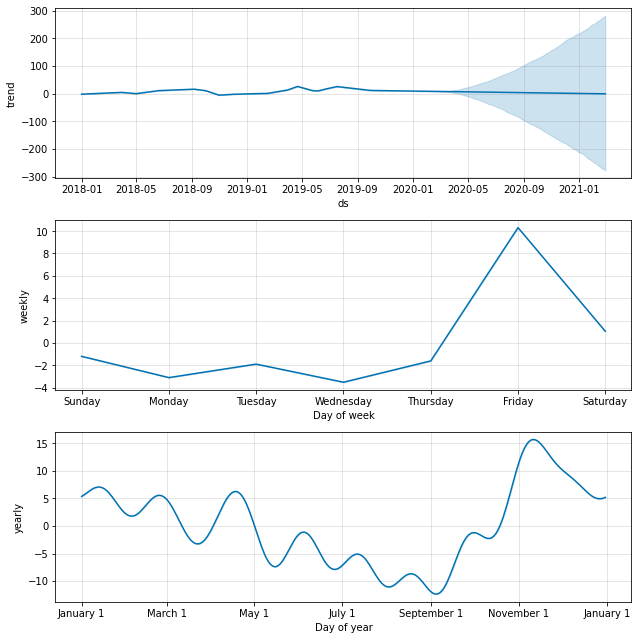

In [45]:
#Components of Forecast
forecast_spot_likes_plot_2 = m_spot_likes.plot_components(forecast_spot_likes)

## Forecast Reply Data for Promotional Posts

In [46]:
#Create Data Frame for Like Data on Promotional Posts
spot_replies_df = spot_df[["date", "replies"]]
spot_replies_df.sort_values(by=["replies"], ascending=False)

,date,replies
7453,2019-11-8,425.0
9207,2020-1-15,130.0
7980,2019-11-25,105.0
9707,2020-2-7,80.0
9763,2020-2-10,53.0
...,...,...
2988,2019-4-8,0.0
2987,2019-4-7,0.0
2978,2019-4-6,0.0
2967,2019-4-5,0.0


In [47]:
#Promotion Likes DF Cleaned
spot_replies_df = spot_replies_df.rename(columns = {"date": "ds", "replies": "y"})
spot_replies_df.head()

,ds,y
0,2018-1-1,0.0
4,2018-1-3,0.0
26,2018-1-15,1.0
31,2018-1-17,0.0
32,2018-1-17,0.0


In [48]:
#Instantiate Prophet Class for Promotions-Likes
m_spot_replies = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.4)


In [49]:
#Train model on Like Data for Promotions
m_spot_replies.fit(spot_replies_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [50]:
#Generate 365 days into future for x-axis
future_spot_replies = m_spot_replies.make_future_dataframe(periods=365)
future_spot_replies.tail()

,ds
2607,2021-02-24
2608,2021-02-25
2609,2021-02-26
2610,2021-02-27
2611,2021-02-28


In [51]:
#Predict Likes of Promotional Posts for 1 Year
forecast_spot_replies = m_spot_replies.predict(future_spot_replies)
forecast_spot_replies[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2607,2021-02-24,5.369119,-8.357600,18.196706
2608,2021-02-25,5.308979,-7.922519,18.914371
2609,2021-02-26,7.001675,-7.166801,19.870259
2610,2021-02-27,4.921431,-8.649430,18.747016
2611,2021-02-28,5.202801,-8.832754,18.752960


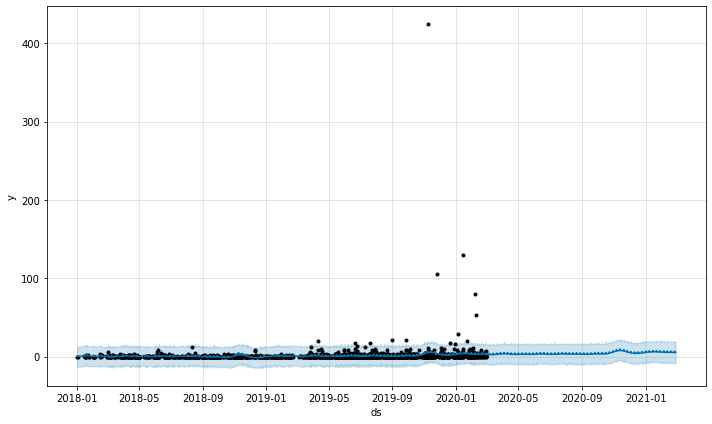

In [52]:
#Plot Forecast of Likes for Promotional Posts
forecast_spot_replies_plot = m_spot_replies.plot(forecast_spot_replies)

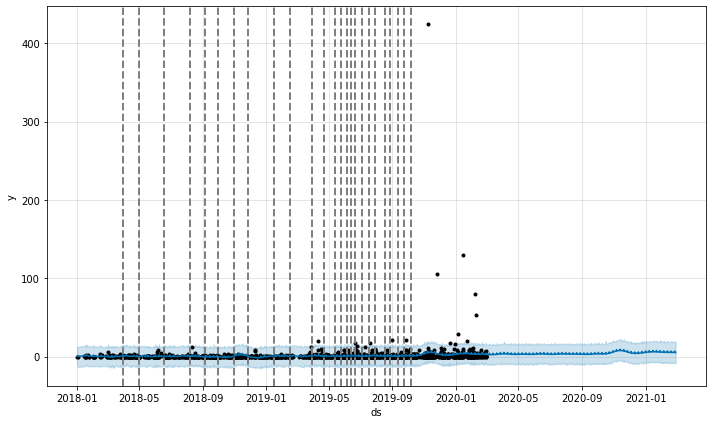

In [53]:
#Plot Changepoints
m_spot_replies.plot(forecast_spot_replies)
a = add_changepoints_to_plot(forecast_spot_replies_plot.gca(), m_spot_replies, forecast_spot_replies)

for cp in m_spot_replies.changepoints:
    plt.axvline(cp, c='gray', ls='--', lw=2)

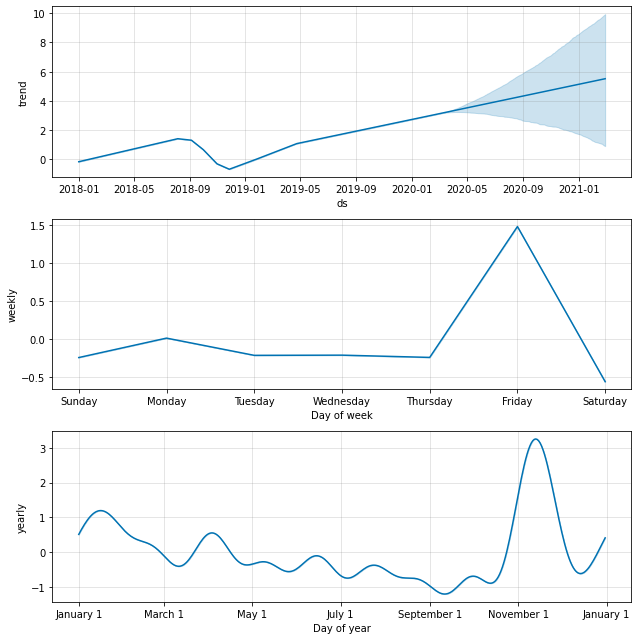

In [54]:
#Components of Forecast
forecast_spot_replies_plot_2 = m_spot_replies.plot_components(forecast_spot_replies)